In [31]:
from pandas import Series
from matplotlib import pyplot

series = Series.from_csv('daily-total-female-births.csv', header=0)
series.head()

C:\Users\Astra\Anaconda3\envs\tf_gpu\lib\site-packages\pandas\core\series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Daily total female births in California, 1959, dtype: int64

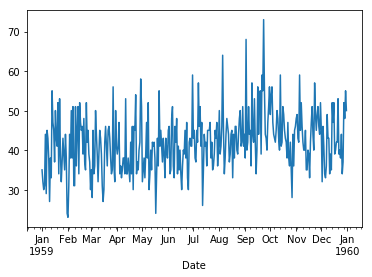

In [32]:
series.plot();

In [33]:
# Tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.head(10)

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Daily total female births in California, 1959, dtype: float64

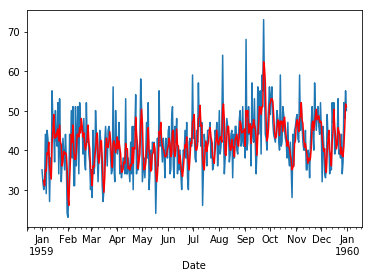

In [34]:
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red');

In [35]:
from pandas import DataFrame
from pandas import concat

In [36]:
df = DataFrame(series.values)

width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)

window = lag3.rolling(window=width)
means = window.mean()

dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']

dataframe.head(10)

,mean,t-1,t+1
0,NaN,NaN,35
1,NaN,35.0,32
2,NaN,32.0,30
3,NaN,30.0,31
4,32.333333,31.0,44
5,31.000000,44.0,29
6,35.000000,29.0,45
7,34.666667,45.0,43
8,39.333333,43.0,38
9,39.000000,38.0,27


In [37]:
from pandas import Series
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [38]:
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

In [39]:
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


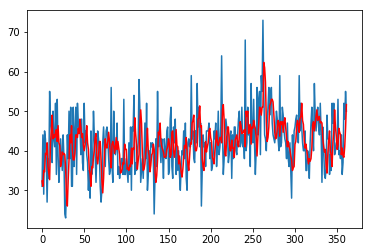

In [40]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red');

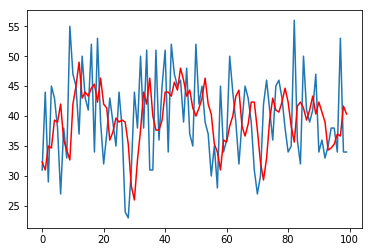

In [41]:
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red');